This notebook is largely based on the post ["quantum label classification using qiskit"](https://quantumcomputing.stackexchange.com/questions/17847/quantum-label-classification-using-qiskit) and its answer by [Tristan Nemoz](https://quantumcomputing.stackexchange.com/users/10454/tristan-nemoz) on Quantum Computing StackExchange

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
import random

import qiskit
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit import Aer
from qiskit import execute
import numpy as np

In [2]:
qiskit.IBMQ.save_account('your_token', overwrite=True)

In [3]:
qiskit.IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

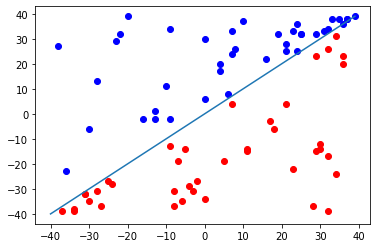

In [30]:
m, b = 1, 0

lower, upper = -40, 40
num_points = 40
x1 = [random.randrange(start=-40, stop=40) for i in range(num_points)]
x2 = [random.randrange(start=-40, stop=40) for i in range(num_points)]

y1 = [random.randrange(start=lower, stop=m*x+b) for x in x1]
y2 = [random.randrange(start=m*x+b, stop=upper) for x in x2]

plt.plot(np.arange(-40,40), m*np.arange(-40,40)+b)
plt.scatter(x1, y1, c='red')
plt.scatter(x2, y2, c='blue')
plt.show()

x1, x2, y1, y2 = np.array(x1).reshape(-1,1), np.array(x2).reshape(-1,1), np.array(y1).reshape(-1,1), np.array(y2).reshape(-1,1)

x_upper = np.concatenate((x2, y2), axis=1)
x_lower = np.concatenate((x1, y1), axis=1)
X = np.concatenate((x_upper, x_lower), axis=0)

res1 = np.array([-1]*len(x1))
res2 = np.array([1]*len(x2))
y = np.concatenate((res1, res2), axis=0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

real device: ibmq_quito
0.7200000000000001


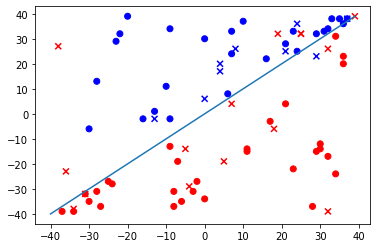

In [34]:
n_wires = 1
n_qubits = 1
provider = qiskit.IBMQ.get_provider('ibm-q') # select the provider
backend = provider.get_backend('ibmq_quito') # select the name of the quatum computer to use
#backend = Aer.get_backend('qasm_simulator')
print("real device:", backend.name())

def quant_state(x1, x2, backend = backend):
    x1 = x1
    x2  = x2
    r = x1 * x1 + x2 * x2
    a = np.sqrt(1 + 2*r)
    psi = [0, 0, 0.5, 0, 0, -0.5, 0, 0, 1/(np.sqrt(2)*a), 0, x1/(np.sqrt(2)*a), x2/(np.sqrt(2)*a), x1/(np.sqrt(2)*a), x2/(np.sqrt(2)*a), 0, 0]
    qc = QuantumCircuit(4)
    qc.initialize(psi, [0,1,2,3])
    qc.h(3)
    qc.measure_all()
    job_sim = execute(qc, backend, shots=1000)
    result_sim = job_sim.result()
    counts = result_sim.get_counts(qc)

    quantumState_1 = 0
    for i in counts.keys():
        list_i = list(i)
        if list_i[0] == '0':
            quantumState_1 += counts[i]

    return quantumState_1

quant_res = []

for i,j in zip(X_test[:, 0], X_test[:, 1]):
    qs = quant_state(i, j, backend = backend)
    if qs >= 500:
        quant_res.append(1)
    else:
        quant_res.append(-1)

print(f1_score(y_test, quant_res))

def get_color(y,zn):
    colors = []

    for i in range(len(y)):
        if y[i] == zn:
            colors.append('red')
        else:
            colors.append('blue')

    return(colors)

colors = get_color(y_train, 1)
quantColors = get_color(quant_res, 1)
plt.scatter(X_train[:, 0], X_train[:, 1], c = colors) 
plt.scatter(X_test[:, 0], X_test[:, 1], c = quantColors, marker = "x")
plt.plot(np.arange(-40,40), m*np.arange(-40,40)+b)
plt.show()

On 11/17/2021, this notebook was running on a real quantum computer (ibmq_quito). There were 23 jobs in total (job numbered 115 to job numbered 137). Accordingly, 23 items are classified (marked as crosses in the diagram). The total duration was 277 minutes and 33 seconds. The average time it takes to finish a job is (277*60+33)/(23*60)=12.07 minutes. Obviously this is not the pure processing time, since we are using shared ressources. The F1 score is 0.72.

The first job "6194bbdb5447594c840dcd5f" (nr. 115) started at 9:22 AM, the second job (nr. 116) started at 9:34 AM. The seventh job (nr. 121) started at 10:28 AM. The nineteenth job (nr. 133) started 12:39 AM. The last job (nr. 137) finished 1:59 PM.
